In [1]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
    }
</style>

In [2]:
import os
os.chdir('/Users/rajatpa/Documents/DS/1_Feature_Engineering_for_Machine_Learning/Rajat_Practice_Sessions')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
use_cols = ['loan_amnt', 'grade', 'purpose', 'issue_d', 'last_pymnt_d']

data = pd.read_csv('loan.csv', usecols=use_cols)

data.head()

loan_amnt grade   issue_d             purpose last_pymnt_d
0       2500     C  Dec-2018  debt_consolidation     Feb-2019
1      30000     D  Dec-2018  debt_consolidation     Feb-2019
2       5000     D  Dec-2018  debt_consolidation     Feb-2019
3       4000     D  Dec-2018  debt_consolidation     Feb-2019
4      30000     C  Dec-2018  debt_consolidation     Feb-2019

In [4]:
# only loan_amnt is the numerical variable and others are categorical
data.dtypes

loan_amnt        int64
grade           object
issue_d         object
purpose         object
last_pymnt_d    object
dtype: object

In [5]:
# now let's parse the dates, currently coded as strings, into datetime format
# this will allow us to make some analysis afterwards

data['issue_dt'] = pd.to_datetime(data.issue_d)
data['last_pymnt_dt'] = pd.to_datetime(data.last_pymnt_d)

data[['issue_d', 'issue_dt', 'last_pymnt_d', 'last_pymnt_dt']].head()

issue_d   issue_dt last_pymnt_d last_pymnt_dt
0  Dec-2018 2018-12-01     Feb-2019    2019-02-01
1  Dec-2018 2018-12-01     Feb-2019    2019-02-01
2  Dec-2018 2018-12-01     Feb-2019    2019-02-01
3  Dec-2018 2018-12-01     Feb-2019    2019-02-01
4  Dec-2018 2018-12-01     Feb-2019    2019-02-01

In [8]:

sam = data.groupby(['issue_dt', 'grade'])
for i , j in sam:
    print (i,j)


(Timestamp('2007-06-01 00:00:00'), 'A')          loan_amnt grade   issue_d purpose last_pymnt_d   issue_dt  \
2142003       5000     A  Jun-2007   other     Aug-2009 2007-06-01   
2142004       2500     A  Jun-2007   other     Jan-2008 2007-06-01   
2142005       3000     A  Jun-2007   other     Jan-2008 2007-06-01   
2142006       2600     A  Jun-2007   other     Mar-2010 2007-06-01   
2142007       1000     A  Jun-2007   other     Jun-2010 2007-06-01   
2142018       6500     A  Jun-2007   other     Jun-2010 2007-06-01   
2142019       5000     A  Jun-2007   other     Jun-2010 2007-06-01   

        last_pymnt_dt  
2142003    2009-08-01  
2142004    2008-01-01  
2142005    2008-01-01  
2142006    2010-03-01  
2142007    2010-06-01  
2142018    2010-06-01  
2142019    2010-06-01  
(Timestamp('2007-06-01 00:00:00'), 'B')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
2141998       4400     B  Jun-2007  debt_consolidation     Jun-2010   
2141999       1200     B 

(Timestamp('2007-12-01 00:00:00'), 'E')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
2139025      25000     E  Dec-2007      small_business     Oct-2008   
2139027      20000     E  Dec-2007         credit_card     Dec-2010   
2139031      22350     E  Dec-2007    home_improvement     Jul-2009   
2139047      24625     E  Dec-2007         credit_card     Dec-2010   
2139058      25000     E  Dec-2007      small_business     Feb-2009   
2139065       2400     E  Dec-2007               other     Dec-2010   
2141671        800     E  Dec-2007              moving     Jun-2008   
2141674       8000     E  Dec-2007  debt_consolidation     Jan-2011   
2141675      15000     E  Dec-2007  debt_consolidation     Dec-2010   
2141684       1350     E  Dec-2007               other     Dec-2010   
2141687      12000     E  Dec-2007  debt_consolidation     May-2009   
2141701        600     E  Dec-2007               other     Nov-2010   
2141702       2825     E  Dec-2007   

(Timestamp('2008-04-01 00:00:00'), 'D')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
2138285      25000     D  Apr-2008      major_purchase     Jul-2009   
2138286       6700     D  Apr-2008  debt_consolidation     May-2011   
2138287       7500     D  Apr-2008               other     Sep-2009   
2138288       7000     D  Apr-2008         credit_card     May-2011   
2138308      12000     D  Apr-2008  debt_consolidation     Feb-2011   
2138326       4600     D  Apr-2008  debt_consolidation     Nov-2009   
2138331       7675     D  Apr-2008         credit_card     Sep-2009   
2138340       9600     D  Apr-2008  debt_consolidation     Dec-2010   
2138348       5000     D  Apr-2008  debt_consolidation     Apr-2011   
2138352       5000     D  Apr-2008  debt_consolidation     Mar-2009   
2138353      15000     D  Apr-2008  debt_consolidation     Apr-2011   
2138357      10000     D  Apr-2008         educational     Jun-2008   
2138368       3000     D  Apr-2008   

(Timestamp('2008-10-01 00:00:00'), 'D')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
2137850      22000     D  Oct-2008  debt_consolidation     Feb-2011   
2137880      14400     D  Oct-2008  debt_consolidation     Sep-2010   
2137881       6000     D  Oct-2008               house     Nov-2011   
2137888      24000     D  Oct-2008  debt_consolidation     Jun-2009   
2137903       6950     D  Oct-2008  debt_consolidation     Sep-2011   
2137908      25000     D  Oct-2008         credit_card     Apr-2010   
2137911      10000     D  Oct-2008             wedding     Dec-2011   
2137943       3000     D  Oct-2008         credit_card     Oct-2011   
2137948       2750     D  Oct-2008         credit_card     Mar-2011   
2137952       6000     D  Oct-2008         credit_card     Sep-2011   
2137954       7500     D  Oct-2008         credit_card     Oct-2009   
2137956       2400     D  Oct-2008             medical     Oct-2011   
2140892      16000     D  Oct-2008  d

(Timestamp('2009-03-01 00:00:00'), 'B')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
2136671      18000     B  Mar-2009  debt_consolidation     Apr-2012   
2136699      10500     B  Mar-2009         credit_card     Jan-2011   
2136700      12000     B  Mar-2009                 car     Jul-2009   
2136714      15000     B  Mar-2009             wedding     Apr-2012   
2136715       3600     B  Mar-2009            vacation     Oct-2010   
2136719       6000     B  Mar-2009  debt_consolidation     Mar-2012   
2136721       9000     B  Mar-2009         credit_card     Apr-2012   
2136722       5000     B  Mar-2009      small_business     Mar-2012   
2136761      10000     B  Mar-2009  debt_consolidation     Apr-2012   
2136771      10000     B  Mar-2009               other     Oct-2011   
2136790      10000     B  Mar-2009  debt_consolidation     Nov-2011   
2136793       3500     B  Mar-2009         credit_card     Apr-2012   
2136801      16000     B  Mar-2009  d

(Timestamp('2009-07-01 00:00:00'), 'D')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
2135332       5550     D  Jul-2009         credit_card     Aug-2012   
2135352       3000     D  Jul-2009      major_purchase     Aug-2012   
2135354       5000     D  Jul-2009             wedding     Nov-2010   
2135368      20000     D  Jul-2009  debt_consolidation     Sep-2011   
2135371      13000     D  Jul-2009  debt_consolidation     Feb-2012   
2135381       9000     D  Jul-2009  debt_consolidation     Aug-2011   
2135396       7500     D  Jul-2009  debt_consolidation     Aug-2012   
2135408      15000     D  Jul-2009         credit_card     Aug-2012   
2135412       6000     D  Jul-2009               other     Apr-2011   
2135414      12000     D  Jul-2009  debt_consolidation     Mar-2012   
2135423       3500     D  Jul-2009              moving     May-2012   
2135432       5000     D  Jul-2009               house     Aug-2010   
2135438       8000     D  Jul-2009  d

(Timestamp('2009-11-01 00:00:00'), 'C')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
2133283       1500     C  Nov-2009               other     Aug-2012   
2133317       8000     C  Nov-2009         credit_card     Jun-2012   
2133321      14100     C  Nov-2009         credit_card     Jan-2010   
2133326       5000     C  Nov-2009    home_improvement     Aug-2011   
2133327       9000     C  Nov-2009  debt_consolidation     Jul-2013   
2133328       3000     C  Nov-2009             wedding     Apr-2011   
2133339       4000     C  Nov-2009  debt_consolidation     Feb-2011   
2133356       2000     C  Nov-2009               other     Mar-2012   
2133357       7500     C  Nov-2009  debt_consolidation     Dec-2012   
2133359       6500     C  Nov-2009               other     Dec-2012   
2133374       6000     C  Nov-2009  debt_consolidation     Oct-2011   
2133377       6250     C  Nov-2009  debt_consolidation     Jan-2010   
2133383       5000     C  Nov-2009  d

(Timestamp('2010-03-01 00:00:00'), 'E')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
2130748       3000     E  Mar-2010         educational     Jun-2011   
2130828      25000     E  Mar-2010  debt_consolidation     Dec-2012   
2130890      18000     E  Mar-2010  debt_consolidation     Mar-2012   
2130891       8000     E  Mar-2010  debt_consolidation     May-2013   
2130967      10000     E  Mar-2010               other     Apr-2013   
2130970      10000     E  Mar-2010  debt_consolidation     Apr-2013   
2130999       6250     E  Mar-2010  debt_consolidation     Jun-2012   
2131013       3000     E  Mar-2010               other     May-2012   
2131016      20000     E  Mar-2010               other     Jan-2013   
2131078      10000     E  Mar-2010  debt_consolidation     Apr-2013   
2131107      20000     E  Mar-2010    home_improvement     Jul-2012   
2131108       3000     E  Mar-2010               other     Jul-2012   
2131119       2500     E  Mar-2010   

(Timestamp('2010-06-01 00:00:00'), 'C')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
2127952      14000     C  Jun-2010  debt_consolidation     Oct-2010   
2127955       7500     C  Jun-2010    home_improvement     Aug-2012   
2127964       7000     C  Jun-2010  debt_consolidation     Jul-2012   
2127966       4800     C  Jun-2010              moving     Feb-2013   
2127981      10000     C  Jun-2010               other     Jan-2011   
2127984       2000     C  Jun-2010  debt_consolidation     May-2011   
2127987      10000     C  Jun-2010               other     Jul-2013   
2127995       8000     C  Jun-2010  debt_consolidation     Jul-2013   
2127998       4500     C  Jun-2010    home_improvement     Feb-2011   
2128004       2100     C  Jun-2010      major_purchase     Jul-2011   
2128013       7000     C  Jun-2010  debt_consolidation     Jul-2012   
2128021       9700     C  Jun-2010  debt_consolidation     Oct-2012   
2128027       1500     C  Jun-2010   

(Timestamp('2010-08-01 00:00:00'), 'B')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
2125733       6000     B  Aug-2010  debt_consolidation     Jul-2011   
2125749       5750     B  Aug-2010         credit_card     Sep-2013   
2125751       5000     B  Aug-2010               other     Apr-2013   
2125763       6000     B  Aug-2010  debt_consolidation     Oct-2012   
2125774       5000     B  Aug-2010  debt_consolidation     Jun-2012   
2125803       9600     B  Aug-2010  debt_consolidation     Jun-2013   
2125806      15000     B  Aug-2010  debt_consolidation     Aug-2012   
2125810       1800     B  Aug-2010  debt_consolidation     Apr-2012   
2125818       4000     B  Aug-2010            vacation     Mar-2011   
2125819       2000     B  Aug-2010               other     Oct-2011   
2125824       8000     B  Aug-2010               other     May-2013   
2125825       7500     B  Aug-2010  debt_consolidation     Mar-2012   
2125828       3000     B  Aug-2010   

(Timestamp('2010-10-01 00:00:00'), 'C')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
2123486       1200     C  Oct-2010    home_improvement     Feb-2011   
2123538       7000     C  Oct-2010  debt_consolidation     Nov-2013   
2123546      10000     C  Oct-2010         credit_card     Nov-2013   
2123551       3500     C  Oct-2010      major_purchase     Mar-2012   
2123556       7500     C  Oct-2010  debt_consolidation     Nov-2013   
2123557      10750     C  Oct-2010  debt_consolidation     Mar-2012   
2123562       5000     C  Oct-2010      major_purchase     Apr-2011   
2123571      10000     C  Oct-2010  debt_consolidation     Mar-2012   
2123588      14000     C  Oct-2010  debt_consolidation     Oct-2012   
2123602      16000     C  Oct-2010      small_business     Dec-2013   
2123610       5300     C  Oct-2010  debt_consolidation     May-2012   
2123612       4000     C  Oct-2010  debt_consolidation     Jul-2013   
2123615      12000     C  Oct-2010   

(Timestamp('2011-01-01 00:00:00'), 'C')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
2119729       8000     C  Jan-2011  debt_consolidation     Mar-2013   
2119742       4400     C  Jan-2011               other     Jul-2012   
2119749       4000     C  Jan-2011               other     Feb-2014   
2119787      25000     C  Jan-2011    home_improvement     Mar-2014   
2119791      17000     C  Jan-2011  debt_consolidation     Jan-2014   
2119793      25000     C  Jan-2011    home_improvement     Feb-2014   
2119801       5600     C  Jan-2011  debt_consolidation     Feb-2014   
2119815      20000     C  Jan-2011      small_business     May-2013   
2119825       9600     C  Jan-2011  debt_consolidation     Sep-2011   
2119831      20000     C  Jan-2011             wedding     Sep-2013   
2119852       2000     C  Jan-2011      major_purchase     Aug-2013   
2119857       4000     C  Jan-2011  debt_consolidation     Jan-2015   
2119863      24250     C  Jan-2011   

(Timestamp('2011-04-01 00:00:00'), 'C')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
2115353       5000     C  Apr-2011    home_improvement     Sep-2012   
2115378       6600     C  Apr-2011  debt_consolidation     Feb-2012   
2115409       8450     C  Apr-2011         credit_card     Feb-2013   
2115412       6000     C  Apr-2011    home_improvement     May-2016   
2115417       4775     C  Apr-2011  debt_consolidation     May-2014   
2115419       3500     C  Apr-2011  debt_consolidation     Jul-2013   
2115447       3500     C  Apr-2011               other     May-2012   
2115469      12000     C  Apr-2011               other     Dec-2011   
2115470      16600     C  Apr-2011  debt_consolidation     Jan-2014   
2115474      15000     C  Apr-2011  debt_consolidation     May-2014   
2115528       4200     C  Apr-2011      major_purchase     May-2014   
2115539       2800     C  Apr-2011               other     Mar-2014   
2115541       6000     C  Apr-2011   

(Timestamp('2011-07-01 00:00:00'), 'F')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
2110059       2000     F  Jul-2011               other     Jan-2013   
2110089      25000     F  Jul-2011  debt_consolidation     Sep-2013   
2110125      25000     F  Jul-2011  debt_consolidation     Jan-2015   
2110199      32000     F  Jul-2011  debt_consolidation     Sep-2013   
2110206      15000     F  Jul-2011  debt_consolidation     Nov-2014   
2110294      10000     F  Jul-2011         credit_card     Mar-2013   
2110310      11000     F  Jul-2011  debt_consolidation     Aug-2014   
2110331      20000     F  Jul-2011      small_business     Apr-2012   
2110332      35000     F  Jul-2011  debt_consolidation     Aug-2013   
2110345      26500     F  Jul-2011  debt_consolidation     Oct-2013   
2110351      17000     F  Jul-2011  debt_consolidation     Oct-2012   
2110454      27200     F  Jul-2011      major_purchase     Jan-2012   
2110622      26000     F  Jul-2011  d

(Timestamp('2011-11-01 00:00:00'), 'A')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
2101283       4000     A  Nov-2011  debt_consolidation     Sep-2014   
2101295       6000     A  Nov-2011  debt_consolidation     Sep-2013   
2101359       5300     A  Nov-2011  debt_consolidation     Dec-2014   
2101392       6000     A  Nov-2011         credit_card     Aug-2014   
2101404       3000     A  Nov-2011                 car     Dec-2014   
2101429       7200     A  Nov-2011  debt_consolidation     Nov-2013   
2101431       5500     A  Nov-2011                 car     Dec-2014   
2101446       6000     A  Nov-2011              moving     Dec-2014   
2101477       4200     A  Nov-2011               other     Dec-2013   
2101494      11000     A  Nov-2011  debt_consolidation     Aug-2013   
2101510       9500     A  Nov-2011  debt_consolidation     Dec-2014   
2101513       8000     A  Nov-2011  debt_consolidation     Dec-2014   
2101519       6000     A  Nov-2011   

(Timestamp('2012-02-01 00:00:00'), 'D')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
1858264       2050     D  Feb-2012         credit_card     May-2013   
1858296       4000     D  Feb-2012                 car     Mar-2017   
1858455      10000     D  Feb-2012  debt_consolidation     Nov-2012   
1858489      11700     D  Feb-2012  debt_consolidation     Jan-2015   
1858546       7000     D  Feb-2012               house     Apr-2015   
1858566       4000     D  Feb-2012  debt_consolidation     Oct-2013   
1858588      15000     D  Feb-2012  debt_consolidation     Mar-2014   
1858619       8400     D  Feb-2012  debt_consolidation     Feb-2013   
1858621      11000     D  Feb-2012  debt_consolidation     Sep-2014   
1858626      20000     D  Feb-2012         credit_card     Jan-2013   
1858630       2500     D  Feb-2012                 car     Apr-2012   
1858645      10700     D  Feb-2012      small_business     Sep-2014   
1858647      16950     D  Feb-2012  d

(Timestamp('2012-05-01 00:00:00'), 'F')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
1849169      30000     F  May-2012  debt_consolidation     May-2017   
1849349      20400     F  May-2012    home_improvement     Oct-2012   
1849373      11500     F  May-2012  debt_consolidation     Jun-2015   
1849427      20000     F  May-2012         credit_card     Aug-2012   
1849463      20000     F  May-2012  debt_consolidation     May-2013   
1849476      35000     F  May-2012  debt_consolidation     Nov-2012   
1849486      22400     F  May-2012  debt_consolidation     Aug-2013   
1849549      35000     F  May-2012  debt_consolidation     Jan-2014   
1849593       9600     F  May-2012  debt_consolidation     Nov-2012   
1849691      28000     F  May-2012  debt_consolidation     Feb-2014   
1849720       5800     F  May-2012  debt_consolidation     Aug-2015   
1849723      30550     F  May-2012      small_business     Jun-2013   
1849727      30000     F  May-2012   

(Timestamp('2012-09-01 00:00:00'), 'B')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
1828355      12000     B  Sep-2012  debt_consolidation     Oct-2015   
1828361       4750     B  Sep-2012  debt_consolidation     Oct-2015   
1828469       9000     B  Sep-2012  debt_consolidation     Oct-2015   
1828509      15000     B  Sep-2012         credit_card     Oct-2015   
1828519       7125     B  Sep-2012  debt_consolidation     Oct-2015   
1828540       4375     B  Sep-2012  debt_consolidation     Oct-2015   
1828554       9000     B  Sep-2012         credit_card     Jun-2015   
1828565       3000     B  Sep-2012  debt_consolidation     Oct-2015   
1828572      10625     B  Sep-2012  debt_consolidation     Jun-2014   
1828590       4000     B  Sep-2012  debt_consolidation     Oct-2015   
1828599      14975     B  Sep-2012         credit_card     May-2015   
1828604       4000     B  Sep-2012         credit_card     Jun-2015   
1828612      14000     B  Sep-2012  d

(Timestamp('2012-12-01 00:00:00'), 'B')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
1809473       7750     B  Dec-2012  debt_consolidation     Jan-2016   
1809706      12000     B  Dec-2012  debt_consolidation     Feb-2014   
1809718       4000     B  Dec-2012  debt_consolidation     Feb-2014   
1809740       6000     B  Dec-2012  debt_consolidation     Apr-2015   
1809744       8000     B  Dec-2012  debt_consolidation     Jan-2016   
1809752       3000     B  Dec-2012            vacation     Jul-2013   
1809814      15000     B  Dec-2012         credit_card     Jan-2016   
1809839      10625     B  Dec-2012         credit_card     Sep-2013   
1809854      12000     B  Dec-2012  debt_consolidation     Nov-2014   
1809855       8500     B  Dec-2012  debt_consolidation     Jan-2016   
1809872       4575     B  Dec-2012  debt_consolidation     Jan-2015   
1809875      12000     B  Dec-2012  debt_consolidation     Jan-2016   
1809886       5375     B  Dec-2012  d

(Timestamp('2013-03-01 00:00:00'), 'B')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
1785785       6400     B  Mar-2013  debt_consolidation     Jun-2015   
1785932      18000     B  Mar-2013  debt_consolidation     Feb-2014   
1786090      18200     B  Mar-2013    home_improvement     Apr-2018   
1786189      32400     B  Mar-2013  debt_consolidation     Apr-2018   
1786231      16000     B  Mar-2013  debt_consolidation     Aug-2016   
1786234      18200     B  Mar-2013  debt_consolidation     Feb-2015   
1786235      12000     B  Mar-2013  debt_consolidation     Apr-2016   
1786266      23000     B  Mar-2013  debt_consolidation     Jul-2017   
1786323      23000     B  Mar-2013  debt_consolidation     Mar-2018   
1786348       9600     B  Mar-2013    home_improvement     Jul-2013   
1786354      20000     B  Mar-2013         credit_card     May-2018   
1786370      21000     B  Mar-2013  debt_consolidation     Dec-2015   
1786374      20000     B  Mar-2013  d

(Timestamp('2013-05-01 00:00:00'), 'C')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
1766439       8000     C  May-2013               other     Jun-2016   
1766659       5000     C  May-2013  debt_consolidation     Aug-2015   
1766674       6000     C  May-2013  debt_consolidation     Nov-2013   
1766688      22675     C  May-2013  debt_consolidation     Jul-2014   
1766882      14000     C  May-2013  debt_consolidation     Jun-2016   
1767086      18825     C  May-2013         credit_card     Jun-2016   
1767114       6000     C  May-2013    home_improvement     Jun-2016   
1767209       5000     C  May-2013               other     Feb-2014   
1767323      12000     C  May-2013  debt_consolidation     Dec-2013   
1767332       6250     C  May-2013  debt_consolidation     Nov-2015   
1767346      10000     C  May-2013         credit_card     May-2016   
1767422      17600     C  May-2013  debt_consolidation     Jun-2018   
1767520      12000     C  May-2013  d

(Timestamp('2013-07-01 00:00:00'), 'D')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
1742104       8875     D  Jul-2013      major_purchase     Aug-2016   
1742458       6350     D  Jul-2013                 car     Jan-2016   
1742825      10000     D  Jul-2013         credit_card     Jan-2016   
1742888      19200     D  Jul-2013         credit_card     Jun-2015   
1743049      12000     D  Jul-2013               other     Jul-2015   
1743133       6075     D  Jul-2013         credit_card     Jan-2016   
1743336      32000     D  Jul-2013  debt_consolidation     Dec-2015   
1743347      18000     D  Jul-2013  debt_consolidation     Jun-2017   
1743459      11400     D  Jul-2013  debt_consolidation     Oct-2014   
1743477      10000     D  Jul-2013         credit_card     Nov-2015   
1743497       4000     D  Jul-2013  debt_consolidation     Sep-2014   
1743529      15000     D  Jul-2013  debt_consolidation     Jan-2015   
1743638       2000     D  Jul-2013   

(Timestamp('2013-10-01 00:00:00'), 'A')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
1702978      16000     A  Oct-2013         credit_card     Apr-2016   
1703083      23575     A  Oct-2013         credit_card     Nov-2014   
1703526       8000     A  Oct-2013         credit_card     Nov-2014   
1703618      12000     A  Oct-2013  debt_consolidation     Oct-2016   
1703690      12000     A  Oct-2013         credit_card     Sep-2015   
1703764       6800     A  Oct-2013         credit_card     Nov-2016   
1703845      21000     A  Oct-2013  debt_consolidation     Apr-2016   
1703955      20000     A  Oct-2013         credit_card     Jul-2015   
1703973      10000     A  Oct-2013         credit_card     Jul-2015   
1704068       5025     A  Oct-2013         credit_card     Jun-2016   
1704079      28000     A  Oct-2013  debt_consolidation     May-2016   
1704081      30000     A  Oct-2013  debt_consolidation     Feb-2014   
1704097      15000     A  Oct-2013   

(Timestamp('2014-01-01 00:00:00'), 'A')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
2083038      12000     A  Jan-2014  debt_consolidation     Jan-2017   
2083066      21000     A  Jan-2014         credit_card     Sep-2015   
2083084      24000     A  Jan-2014  debt_consolidation     Dec-2015   
2083087      12000     A  Jan-2014  debt_consolidation     Feb-2017   
2083094      20000     A  Jan-2014         credit_card     Nov-2015   
2083097      24000     A  Jan-2014  debt_consolidation     Mar-2016   
2083111      25000     A  Jan-2014         credit_card     Oct-2015   
2083112       8000     A  Jan-2014  debt_consolidation     Aug-2014   
2083121       4000     A  Jan-2014         credit_card     Sep-2016   
2083145      28000     A  Jan-2014  debt_consolidation     Feb-2017   
2083154       8000     A  Jan-2014         credit_card     Feb-2017   
2083157      24000     A  Jan-2014         credit_card     Mar-2016   
2083179       6600     A  Jan-2014   

(Timestamp('2014-04-01 00:00:00'), 'C')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
2030043       4200     C  Apr-2014  debt_consolidation     May-2017   
2030071      18000     C  Apr-2014  debt_consolidation     May-2017   
2030171       6625     C  Apr-2014    home_improvement     Feb-2015   
2030482      18000     C  Apr-2014         credit_card     Jan-2016   
2030529      17000     C  Apr-2014  debt_consolidation     Jun-2014   
2030685      12125     C  Apr-2014  debt_consolidation     Sep-2017   
2030754      18000     C  Apr-2014  debt_consolidation     Aug-2017   
2030761      25000     C  Apr-2014         credit_card     Feb-2019   
2030833      23000     C  Apr-2014  debt_consolidation     Oct-2014   
2030871       7800     C  Apr-2014  debt_consolidation     Feb-2016   
2030923      10000     C  Apr-2014         credit_card     Jan-2015   
2030982      12000     C  Apr-2014  debt_consolidation     May-2017   
2030992       4200     C  Apr-2014   

(Timestamp('2014-07-01 00:00:00'), 'C')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
1964344       3000     C  Jul-2014  debt_consolidation     Dec-2016   
1964457      16000     C  Jul-2014  debt_consolidation     Aug-2016   
1964471       5000     C  Jul-2014  debt_consolidation     Aug-2017   
1964761       8000     C  Jul-2014  debt_consolidation     Dec-2015   
1964799       6000     C  Jul-2014  debt_consolidation     Jun-2017   
1965025       3200     C  Jul-2014         credit_card     May-2017   
1965176      15050     C  Jul-2014  debt_consolidation     Sep-2017   
1965194       5925     C  Jul-2014  debt_consolidation     Dec-2015   
1965213       7350     C  Jul-2014  debt_consolidation     Oct-2015   
1965252       9500     C  Jul-2014  debt_consolidation     Jul-2016   
1965332       3000     C  Jul-2014              moving     Oct-2015   
1965448       8500     C  Jul-2014  debt_consolidation     May-2016   
1965494       6000     C  Jul-2014   

(Timestamp('2014-09-01 00:00:00'), 'E')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
1935654      15000     E  Sep-2014  debt_consolidation     Jul-2015   
1936357      30000     E  Sep-2014  debt_consolidation     Sep-2015   
1936379      10000     E  Sep-2014  debt_consolidation     Aug-2017   
1936389      10000     E  Sep-2014  debt_consolidation     Feb-2019   
1936545       1500     E  Sep-2014               other          NaN   
1936588      10325     E  Sep-2014  debt_consolidation     Mar-2016   
1936812      20000     E  Sep-2014    home_improvement     Feb-2017   
1936880      17250     E  Sep-2014  debt_consolidation     Sep-2018   
1936896      25000     E  Sep-2014  debt_consolidation     Feb-2019   
1936985      20000     E  Sep-2014  debt_consolidation     Aug-2016   
1936994      35000     E  Sep-2014  debt_consolidation     Mar-2015   
1936998      24000     E  Sep-2014  debt_consolidation     Feb-2019   
1937022      20000     E  Sep-2014   

(Timestamp('2014-12-01 00:00:00'), 'E')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
1863863      21075     E  Dec-2014  debt_consolidation     Feb-2019   
1863877      13550     E  Dec-2014  debt_consolidation     Feb-2019   
1863883      15000     E  Dec-2014               other     Feb-2019   
1863891       8750     E  Dec-2014              moving     Mar-2017   
1863930      11175     E  Dec-2014  debt_consolidation     Jan-2018   
1863933      13375     E  Dec-2014         credit_card     Feb-2019   
1863948      19200     E  Dec-2014  debt_consolidation     Nov-2017   
1863966      24000     E  Dec-2014    home_improvement     Jan-2016   
1863970      12600     E  Dec-2014  debt_consolidation     Jan-2016   
1863981      16375     E  Dec-2014  debt_consolidation     Feb-2016   
1863991      10000     E  Dec-2014         credit_card     Jan-2018   
1863997      14400     E  Dec-2014  debt_consolidation     Mar-2015   
1863999      35000     E  Dec-2014   

(Timestamp('2015-03-01 00:00:00'), 'E')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
1262062       7900     E  Mar-2015  debt_consolidation     Feb-2018   
1262532      22000     E  Mar-2015  debt_consolidation     Mar-2016   
1262707      27725     E  Mar-2015  debt_consolidation     Jun-2017   
1262886      11200     E  Mar-2015  debt_consolidation     Mar-2016   
1263097      13000     E  Mar-2015         credit_card     Jan-2018   
1263133      25000     E  Mar-2015  debt_consolidation     Mar-2017   
1263602       6875     E  Mar-2015      small_business     Jan-2016   
1263665      30000     E  Mar-2015         credit_card     Feb-2016   
1263725      15625     E  Mar-2015  debt_consolidation     May-2018   
1263740      21525     E  Mar-2015  debt_consolidation     Oct-2016   
1263994       7700     E  Mar-2015               other     Mar-2018   
1264043      13000     E  Mar-2015  debt_consolidation     Jul-2017   
1264050      14175     E  Mar-2015  d

(Timestamp('2015-06-01 00:00:00'), 'E')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
1166596      14000     E  Jun-2015  debt_consolidation     May-2016   
1166599      11700     E  Jun-2015  debt_consolidation     Nov-2015   
1166723      24000     E  Jun-2015  debt_consolidation     Jan-2017   
1166729       4000     E  Jun-2015  debt_consolidation     Jul-2018   
1166759      18050     E  Jun-2015  debt_consolidation     Sep-2016   
1166819      12000     E  Jun-2015         credit_card     Feb-2019   
1166951      12500     E  Jun-2015  debt_consolidation     Feb-2019   
1166973      27450     E  Jun-2015  debt_consolidation     Feb-2016   
1167017      19825     E  Jun-2015  debt_consolidation     Mar-2016   
1167143      11900     E  Jun-2015  debt_consolidation     Feb-2019   
1167267      16000     E  Jun-2015               other     Nov-2015   
1167458      16000     E  Jun-2015         credit_card     Mar-2016   
1167532      17025     E  Jun-2015  d

(Timestamp('2015-09-01 00:00:00'), 'D')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
1059352       2500     D  Sep-2015              moving     Aug-2017   
1059356      13200     D  Sep-2015         credit_card     Nov-2015   
1059360      10000     D  Sep-2015  debt_consolidation     May-2016   
1059384      25000     D  Sep-2015  debt_consolidation     Apr-2017   
1059385       8075     D  Sep-2015    home_improvement     Feb-2017   
1059387       5000     D  Sep-2015               other     Sep-2016   
1059398      21425     D  Sep-2015  debt_consolidation     Feb-2019   
1059400      12000     D  Sep-2015  debt_consolidation     Jul-2016   
1059410      15000     D  Sep-2015  debt_consolidation     Jan-2018   
1059427      15000     D  Sep-2015               other     Mar-2017   
1059435      17600     D  Sep-2015  debt_consolidation     Dec-2017   
1059436       3650     D  Sep-2015  debt_consolidation     Jan-2016   
1059442      31675     D  Sep-2015  d

(Timestamp('2015-12-01 00:00:00'), 'D')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
929653       14025     D  Dec-2015  debt_consolidation     Dec-2016   
929661       17925     D  Dec-2015  debt_consolidation     Feb-2019   
929663       11550     D  Dec-2015         credit_card     Nov-2017   
929672       27300     D  Dec-2015    home_improvement     Oct-2016   
929684       10000     D  Dec-2015  debt_consolidation     Jun-2016   
929688       23850     D  Dec-2015  debt_consolidation     Feb-2019   
929689       28000     D  Dec-2015  debt_consolidation     Oct-2018   
929697       10500     D  Dec-2015         credit_card     May-2018   
929702       15700     D  Dec-2015         credit_card     Feb-2019   
929704        7200     D  Dec-2015  debt_consolidation     Dec-2016   
929709       30000     D  Dec-2015    home_improvement     Dec-2016   
929714       20200     D  Dec-2015  debt_consolidation     Jul-2017   
929732        2500     D  Dec-2015   

(Timestamp('2016-03-01 00:00:00'), 'G')         loan_amnt grade   issue_d             purpose last_pymnt_d   issue_dt  \
692415       2000     G  Mar-2016               other     May-2016 2016-03-01   
692936      25150     G  Mar-2016               other     May-2016 2016-03-01   
693252      27200     G  Mar-2016         credit_card     Aug-2016 2016-03-01   
693404       5325     G  Mar-2016  debt_consolidation     Aug-2018 2016-03-01   
693466      24900     G  Mar-2016         credit_card     Sep-2016 2016-03-01   
693703       7450     G  Mar-2016  debt_consolidation     Oct-2017 2016-03-01   
693775      17600     G  Mar-2016               other     Feb-2019 2016-03-01   
693942       6075     G  Mar-2016         credit_card     Feb-2017 2016-03-01   
694172      25000     G  Mar-2016  debt_consolidation     Oct-2017 2016-03-01   
694264      23550     G  Mar-2016  debt_consolidation     May-2017 2016-03-01   
694265      32300     G  Mar-2016  debt_consolidation     Feb-2017 20

(Timestamp('2016-06-01 00:00:00'), 'G')         loan_amnt grade   issue_d             purpose last_pymnt_d   issue_dt  \
594610      10500     G  Jun-2016    home_improvement     Feb-2019 2016-06-01   
594702      35000     G  Jun-2016  debt_consolidation     Oct-2017 2016-06-01   
594757      13975     G  Jun-2016    home_improvement     Feb-2019 2016-06-01   
594945      35000     G  Jun-2016  debt_consolidation     Mar-2018 2016-06-01   
595131       9200     G  Jun-2016  debt_consolidation     Apr-2017 2016-06-01   
595240      11000     G  Jun-2016  debt_consolidation     Dec-2016 2016-06-01   
595391      33000     G  Jun-2016  debt_consolidation     Feb-2019 2016-06-01   
595537      18600     G  Jun-2016  debt_consolidation     Dec-2018 2016-06-01   
595588      30000     G  Jun-2016  debt_consolidation     Oct-2017 2016-06-01   
595720      12000     G  Jun-2016               house     Feb-2019 2016-06-01   
596736      20000     G  Jun-2016               other     Aug-2016 20

(Timestamp('2016-09-01 00:00:00'), 'G')         loan_amnt grade   issue_d             purpose last_pymnt_d   issue_dt  \
495450      35000     G  Sep-2016  debt_consolidation     Feb-2019 2016-09-01   
495496      35000     G  Sep-2016      small_business     Jun-2017 2016-09-01   
495825      34000     G  Sep-2016               other     Sep-2017 2016-09-01   
496358      21000     G  Sep-2016  debt_consolidation     Feb-2018 2016-09-01   
496497      15450     G  Sep-2016               other     Jul-2017 2016-09-01   
496883      26400     G  Sep-2016  debt_consolidation     Oct-2018 2016-09-01   
497103      19000     G  Sep-2016  debt_consolidation     Nov-2017 2016-09-01   
497104      33525     G  Sep-2016               other     Aug-2018 2016-09-01   
497153      28000     G  Sep-2016               other     Feb-2019 2016-09-01   
497378      27200     G  Sep-2016  debt_consolidation     Apr-2018 2016-09-01   
497563      35000     G  Sep-2016    home_improvement     Jun-2018 20

(Timestamp('2016-12-01 00:00:00'), 'E')         loan_amnt grade   issue_d             purpose last_pymnt_d   issue_dt  \
826109      25900     E  Dec-2016         credit_card     Apr-2018 2016-12-01   
826150      23000     E  Dec-2016  debt_consolidation     Apr-2018 2016-12-01   
826169       6050     E  Dec-2016  debt_consolidation     Jan-2019 2016-12-01   
826173      10000     E  Dec-2016               other     Feb-2019 2016-12-01   
826197      10000     E  Dec-2016               other     Feb-2018 2016-12-01   
826239      12000     E  Dec-2016  debt_consolidation     Feb-2019 2016-12-01   
826241      19350     E  Dec-2016  debt_consolidation     Jan-2017 2016-12-01   
826256      30000     E  Dec-2016               other     Feb-2019 2016-12-01   
826287      15475     E  Dec-2016  debt_consolidation     Jan-2017 2016-12-01   
826306      13000     E  Dec-2016  debt_consolidation     Feb-2019 2016-12-01   
826335       6000     E  Dec-2016               house     Jan-2019 20

(Timestamp('2017-03-01 00:00:00'), 'F')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
1350859       7000     F  Mar-2017  debt_consolidation     Aug-2017   
1350884      12000     F  Mar-2017  debt_consolidation     May-2017   
1350960       1000     F  Mar-2017            vacation     Apr-2018   
1351155       4900     F  Mar-2017    home_improvement     Feb-2019   
1351370      16000     F  Mar-2017  debt_consolidation     Mar-2018   
1351448      16000     F  Mar-2017  debt_consolidation     Feb-2019   
1351478      25000     F  Mar-2017  debt_consolidation     Jun-2017   
1351557      15000     F  Mar-2017               other     Nov-2018   
1351600      15000     F  Mar-2017  debt_consolidation     Jun-2017   
1351649      13300     F  Mar-2017  debt_consolidation     Apr-2017   
1351706      16800     F  Mar-2017  debt_consolidation     Feb-2019   
1351752      15925     F  Mar-2017         credit_card     Feb-2018   
1351917       8000     F  Mar-2017  d

(Timestamp('2017-06-01 00:00:00'), 'G')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
1570309      17700     G  Jun-2017    home_improvement     Jul-2017   
1570323      35000     G  Jun-2017  debt_consolidation     Feb-2019   
1570864       5500     G  Jun-2017  debt_consolidation     Aug-2017   
1571098      19375     G  Jun-2017  debt_consolidation     Feb-2019   
1571300      35000     G  Jun-2017    home_improvement     Feb-2019   
1572093       3000     G  Jun-2017              moving          NaN   
1572422       2950     G  Jun-2017              moving     Apr-2018   
1572794      10000     G  Jun-2017  debt_consolidation     Feb-2019   
1572934      30300     G  Jun-2017         credit_card     Dec-2017   
1573034      16475     G  Jun-2017  debt_consolidation     Feb-2019   
1573099      20000     G  Jun-2017  debt_consolidation     Feb-2019   
1573226      24000     G  Jun-2017  debt_consolidation     Dec-2018   
1573405       2950     G  Jun-2017   

(Timestamp('2017-09-01 00:00:00'), 'G')          loan_amnt grade   issue_d             purpose last_pymnt_d  \
1447552      40000     G  Sep-2017         credit_card     Feb-2019   
1447555      15000     G  Sep-2017         credit_card     Feb-2018   
1447635      11025     G  Sep-2017  debt_consolidation     Nov-2017   
1447760      31250     G  Sep-2017               house     May-2018   
1447865      20300     G  Sep-2017         credit_card     Feb-2019   
1447942      21750     G  Sep-2017  debt_consolidation     Feb-2018   
1448131      35000     G  Sep-2017  debt_consolidation     Oct-2018   
1448189       2825     G  Sep-2017              moving     Feb-2019   
1448357      17600     G  Sep-2017         credit_card     Feb-2019   
1448444      35000     G  Sep-2017         credit_card     Feb-2019   
1448468      14400     G  Sep-2017  debt_consolidation     Jan-2018   
1448540      24000     G  Sep-2017      major_purchase     Feb-2019   
1448658      10000     G  Sep-2017  d

(Timestamp('2018-01-01 00:00:00'), 'A')         loan_amnt grade   issue_d             purpose last_pymnt_d   issue_dt  \
458171       6500     A  Jan-2018               other     Feb-2019 2018-01-01   
458174      13200     A  Jan-2018      major_purchase     Feb-2019 2018-01-01   
458177       4500     A  Jan-2018               other     Feb-2019 2018-01-01   
458200       6000     A  Jan-2018               house     Feb-2019 2018-01-01   
458217      40000     A  Jan-2018  debt_consolidation     Feb-2019 2018-01-01   
458219      21000     A  Jan-2018  debt_consolidation     Sep-2018 2018-01-01   
458234       9000     A  Jan-2018  debt_consolidation     Feb-2018 2018-01-01   
458242       5100     A  Jan-2018               other     Jun-2018 2018-01-01   
458255       8500     A  Jan-2018               other     Feb-2019 2018-01-01   
458292       1000     A  Jan-2018         credit_card     Feb-2019 2018-01-01   
458296      22000     A  Jan-2018  debt_consolidation     Feb-2019 20

(Timestamp('2018-04-01 00:00:00'), 'C')         loan_amnt grade   issue_d             purpose last_pymnt_d   issue_dt  \
343486      35000     C  Apr-2018               other     Feb-2019 2018-04-01   
343487       5000     C  Apr-2018  debt_consolidation     Feb-2019 2018-04-01   
343496      16000     C  Apr-2018  debt_consolidation     Feb-2019 2018-04-01   
343499      10000     C  Apr-2018  debt_consolidation     Feb-2019 2018-04-01   
343500       7800     C  Apr-2018  debt_consolidation     Feb-2019 2018-04-01   
343517      16000     C  Apr-2018    home_improvement     Feb-2019 2018-04-01   
343520      15000     C  Apr-2018  debt_consolidation     Feb-2019 2018-04-01   
343526      24775     C  Apr-2018  debt_consolidation     Feb-2019 2018-04-01   
343537      12800     C  Apr-2018  debt_consolidation     Feb-2019 2018-04-01   
343546      22000     C  Apr-2018  debt_consolidation     Feb-2019 2018-04-01   
343549      20000     C  Apr-2018  debt_consolidation     Feb-2019 20

(Timestamp('2018-07-01 00:00:00'), 'C')         loan_amnt grade   issue_d             purpose last_pymnt_d   issue_dt  \
212546      12000     C  Jul-2018  debt_consolidation     Feb-2019 2018-07-01   
212557      12600     C  Jul-2018  debt_consolidation     Feb-2019 2018-07-01   
212558      18000     C  Jul-2018  debt_consolidation     Feb-2019 2018-07-01   
212565      10000     C  Jul-2018         credit_card     Feb-2019 2018-07-01   
212567      30000     C  Jul-2018               other     Feb-2019 2018-07-01   
212578      25000     C  Jul-2018         credit_card     Feb-2019 2018-07-01   
212581      15000     C  Jul-2018         credit_card     Feb-2019 2018-07-01   
212582      35000     C  Jul-2018  debt_consolidation     Feb-2019 2018-07-01   
212585       8500     C  Jul-2018               other     Feb-2019 2018-07-01   
212586      20000     C  Jul-2018  debt_consolidation     Feb-2019 2018-07-01   
212591       8400     C  Jul-2018  debt_consolidation     Feb-2019 20

(Timestamp('2018-10-01 00:00:00'), 'D')         loan_amnt grade   issue_d             purpose last_pymnt_d   issue_dt  \
81608       35000     D  Oct-2018  debt_consolidation     Feb-2019 2018-10-01   
81612       20000     D  Oct-2018  debt_consolidation     Feb-2019 2018-10-01   
81622       30000     D  Oct-2018               other     Feb-2019 2018-10-01   
81623       34650     D  Oct-2018  debt_consolidation     Feb-2019 2018-10-01   
81633       17000     D  Oct-2018  debt_consolidation     Feb-2019 2018-10-01   
81642       33600     D  Oct-2018  debt_consolidation     Jan-2019 2018-10-01   
81643       30000     D  Oct-2018  debt_consolidation     Feb-2019 2018-10-01   
81688       13175     D  Oct-2018  debt_consolidation     Feb-2019 2018-10-01   
81699        9000     D  Oct-2018  debt_consolidation     Feb-2019 2018-10-01   
81703        6000     D  Oct-2018         credit_card     Jan-2019 2018-10-01   
81728       15000     D  Oct-2018    home_improvement     Feb-2019 20

Text(0, 0.5, 'Disbursed Amount (US Dollars)')

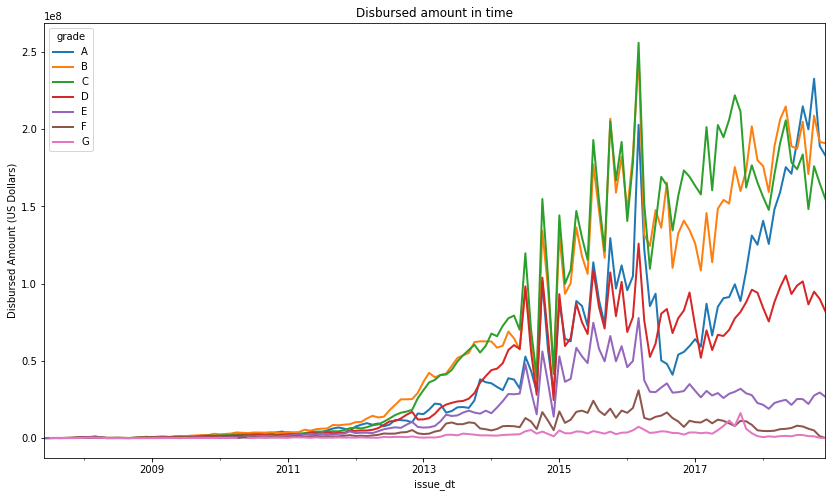

In [9]:
# here we are doing a group by using issue_dt', 'grade' and then taking the loan_amnt from that created DataFrame
# Then summming the loan_amnt columns and then we are unstacking it 
# let's see how much money Lending Club has disbursed
# (i.e., lent) over the years to the different risk
# markets (grade variable)

fig = data.groupby(['issue_dt', 'grade'])['loan_amnt'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed Amount (US Dollars)')

In [10]:
# Lending Club seems to have increased the amount of money lent from 2013 onwards. The tendency indicates that they continue to grow. In addition, we can see that
# their major business comes from lending money to C and B grades.
# 'A' grades are the lower risk borrowers, this is borrowers that most likely will be able to repay their loans, as they are typically in a better financial situation.
# Borrowers within this grade are typically charged lower interest rates
# E, F and G grades represent the riskier borrowers. Usually borrowers in somewhat tighter financial situations,
# or for whom there is not sufficient financial history to make a reliable credit assessment.
# They are typically charged higher rates, as the business, and therefore the investors, 
# take a higher risk when lending them money